<a href="https://colab.research.google.com/github/renan-borelli/PLN---3Q2023/blob/main/ATV_04_2023Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q3]**
Prof. Alexandre Donizeti Alves

### **ATIVIDADE PRÁTICA 04 [Uso da API da OpenAI com técnicas de PLN]**


A **ATIVIDADE PRÁTICA 04** deve ser feita utilizando o **Google Colab** com uma conta sua vinculada ao Gmail. O link do seu notebook, armazenado no Google Drive, além do link de um repositório no GitHub e os principais resultados da atividade, devem ser enviados usando o seguinte formulário:

> https://forms.gle/GzwCq3R7ExtE9g9a8


**IMPORTANTE**: A submissão deve ser feita até o dia 20/11 (segunda-feira) APENAS POR UM INTEGRANTE DA EQUIPE, até às 23h59. Por favor, lembre-se de dar permissão de ACESSO IRRESTRITO para o professor da disciplina de PLN.

### **EQUIPE**

---

**POR FAVOR, PREENCHER OS INTEGRANDES DA SUA EQUIPE:**


**Integrante 01:**

`Por favor, informe o seu nome completo e RA:` Renan Borelli Andrade - 11201921098

**Integrante 02:**

`Por favor, informe o seu nome completo e RA:` Lucas Cardoso de Carvalho - 11202021207

### **LIVRO**
---

`Processamento de Linguagem Natural - Conceitos, Técnicas e Aplicações em Português.`

>

Disponível gratuitamente em:
  
  > https://brasileiraspln.com/livro-pln/1a-edicao/.


**POR FAVOR, PREENCHER OS CAPITULOS SELECIONADOS PARA A SUA EQUIPE:**

`Primeiro capítulo: ` 3

`Segundo capítulo:` 23



### **DESCRIÇÃO**
---

Implementar um `notebook` no `Google Colab` que faça uso da **API da OpenAI** aplicando, no mínimo, 3 técnicas de PLN. As técnicas devem ser aplicadas nos 2 (DOIS) capítulos do livro **Processamento de Linguagem Natural - Conceitos, Técnicas e Aplicações em Português**.

>

**RESTRIÇÃO**: É obrigatório usar o *endpoint* "*`Chat Completions`*".

>

As seguintes técnicas de PLN podem ser usadas:

*   Correção Gramatical
*   Classificação de Textos
*   Análise de Sentimentos
*   Detecção de Emoções
*   Extração de Palavras-chave
*   Tradução de Textos
*   Sumarização de Textos
*   **Similaridade de Textos**
*   **Reconhecimento de Entidades Nomeadas**
*   **Sistemas de Perguntas e Respostas**

>

Os capítulos devem ser os mesmos selecionados na **ATIVIDADE PRÁTICA 02**. Para consultar os capítulos, considere a seguinte planilha:

>

> https://docs.google.com/spreadsheets/d/1ZutzQ3v1OJgsgzCvCwxXlRIQ3ChXNlHNvB63JQvYsbo/edit?usp=sharing

>
>

**IMPORTANTE:** É obrigatório usar o e-mail da UFABC. Não é permitido alterar os capítulos já selecionados.



### **CRITÉRIOS DE AVALIAÇÃO**
---


Serão considerados como critérios de avaliação as técnicas usadas e a criatividade envolvida na aplicação das mesmas.




### **IMPLEMENTAÇÃO**
---

In [ ]:
# INSTALAÇÕES NECESSÁRIAS
!pip install openai
!pip install nltk
!pip install requests
!pip install BeautifulSoup
!pip install wordcloud
!pip install matplotlib
!pip install pillow


  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# IMPORTANDO AS BIBLIOTECAS
import os
import requests
import re
import nltk
import random
import getpass as gp
import matplotlib.pyplot as plt
from openai import OpenAI
from bs4 import BeautifulSoup
from nltk import ngrams
from nltk.corpus import stopwords
from wordcloud import WordCloud
from io import BytesIO
from PIL import Image
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# DEFINE O CLIENTE PARA SER USADO NA API
key = gp.getpass("Digite sua chave secreta da api da openai: ")

client = OpenAI(
    api_key=key,
)


Digite sua chave secreta da api da openai: ··········


In [ ]:
#1 TESTANDO A NOVA VERSÃO (1.2.3) DA API E SEU NOVO MODELO DE FUNCIONAMENTO

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Diga que isso é apenas um teste.",
        }
    ],
    model="gpt-3.5-turbo",
)

print(chat_completion.choices[0].message.content)


Isso é apenas um teste.


In [ ]:
# FUNÇÕES DE REQUISIÇÃO, TRATAMENTO MÍNIMO DO TEXTO E AGRUPAMENTO DE STRINGS A PARTIR DO LIMITE DE TOKENS
def obter_texto_da_url(url):
    try:
        resposta = requests.get(url)
        resposta.raise_for_status()
        resposta.encoding = resposta.apparent_encoding  # Ajusta a codificação
        return resposta.text
    except requests.exceptions.HTTPError as err:
        raise SystemExit(err)

def extrair_texto_html(html):
    soup = BeautifulSoup(html, 'html.parser')
    elementos = soup.select('main p, main ol, main ul')
    texto = ''
    for elemento in elementos:
        texto += elemento.get_text() + '\n'
    return texto

def agrupar_strings(strings, limite_tokens):
    lotes = []
    lote_atual = []
    total_tokens = 0

    for string in strings:
        tokens_na_string = len(string.split())

        if total_tokens + tokens_na_string <= limite_tokens:
            lote_atual.append(string)
            total_tokens += tokens_na_string
        else:
            lotes.append(' '.join(lote_atual))
            lote_atual = [string]
            total_tokens = tokens_na_string

    if lote_atual:
        lotes.append(' '.join(lote_atual))

    return lotes

def remover_entre_parenteses(texto):
    # Usando uma expressão regular para encontrar e remover o conteúdo entre parênteses
    return re.sub(r'\([^)]*\)', '', texto)

# Função para extrair n-gramas removendo stopwords
def extrair_ngramas_sem_stopwords(texto, n):
    tokens = nltk.word_tokenize(texto)
    ngramas = list(ngrams(tokens, n))
    ngramas_filtrados = [' '.join(ngrama) for ngrama in ngramas if all(word.lower() not in stopwords_pt and word.isalpha() for word in ngrama)]
    return ngramas_filtrados


Temos a seguir o resumo do capítulo e uma núvem de palavras do resumo do capítulo:

' Até meados de 2020, o português brasileiro tinha poucos recursos de dados de fala disponíveis para pesquisas acadêmicas, em comparação com a língua inglesa. Para o treinamento de modelos de reconhecimento de fala, havia aproximadamente 60 horas de dados de fala lida disponíveis em quatro conjuntos de dados diferentes. Para o treinamento de modelos de síntese de fala, havia um conjunto de dados de um único locutor com 10 horas e 28 minutos de fala. Essa falta de dados públicos de fala em português brasileiro levou à criação do projeto TaRSila em agosto de 2020, financiado pela IBM e FAPESP, com o objetivo de aumentar os conjuntos de dados de fala em PB para treinamento de sistemas e pesquisas linguísticas.

O projeto TaRSila visa a aumentar os conjuntos de dados de fala em PB para várias tarefas, como clonagem de voz, predição da pontuação e capitalização, segmentação prosódica, reconhecimento de emoçõ

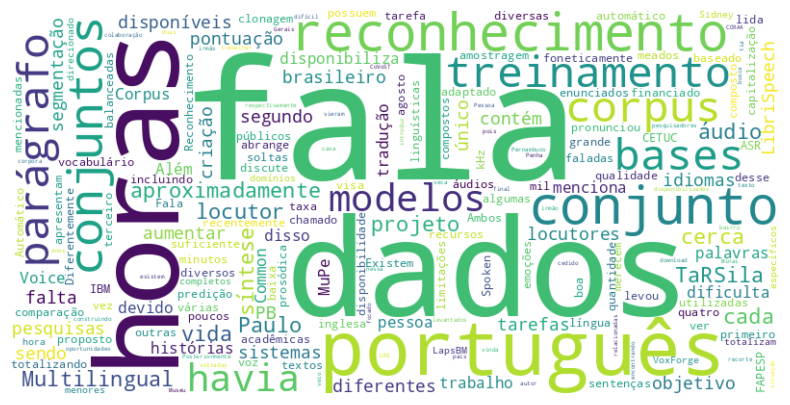

In [ ]:
# # EXECUÇÃO DOS TESTES NO CAPÍTULO 3 - SUMARIZAÇÃO DE TEXTOS
url_capitulos = ["https://brasileiraspln.com/livro-pln/1a-edicao/parte2/cap3/cap3.html"]
for url in url_capitulos:

    texto_html = obter_texto_da_url(url)

    texto_limpo = extrair_texto_html(texto_html)

    lista_paragrafos = texto_limpo.splitlines()

    lista_sem_links = [string for string in lista_paragrafos if "http" not in string]

    lista_textos_relevantes = [string for string in lista_sem_links if len(string) >= 200]

    lista_textos_tratados = [remover_entre_parenteses(string) for string in lista_textos_relevantes]

    lista_texto_agrupados = agrupar_strings(lista_textos_tratados, 2200) # VALOR LIMITE DE TOKENS NA STRING CONSIDERANDO O LIMITE TOTAL DE 4096 TOKENS QUE O MODELO PERMITE RECEBER

    resumos = []

    for texto in lista_texto_agrupados:
        prompt = "Faça um resumo de até 300 palavras do seguinte parágrafo: " + texto
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": prompt,
                }
            ],
            model="gpt-3.5-turbo",
            temperature=0.8, # TEMPERATURA MEDIANA PARA MELHORAR O RESUMO
            max_tokens=256 # LIMITAÇÃO DE TAMANHO DA RESPOTA (GARANTINDO TAMANHO SOLICITADO)
        )
        resumos.append(chat_completion.choices[0].message.content)

    # IDEIA DE APLICAÇÃO: RESUMO EM WORDCLOUD

    print("Temos a seguir o resumo do capítulo e uma núvem de palavras do resumo do capítulo:\n")
    texto_completo = ' '.join(resumos)
    print("'", texto_completo + "'\n")

    # Lista de stopwords em português
    stopwords_pt = set(stopwords.words('portuguese'))

    # Extrair n-gramas sem stopwords
    n = 1 # teste com unigramas
    ngramas_sem_stopwords = extrair_ngramas_sem_stopwords(texto_completo, n)

    # Contar a ocorrência de cada ngrama
    contagem_ngramas = Counter(ngramas_sem_stopwords)

    # Criar uma nuvem de palavras usando a frequência dos ngramas
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(contagem_ngramas)

    # Exibir a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


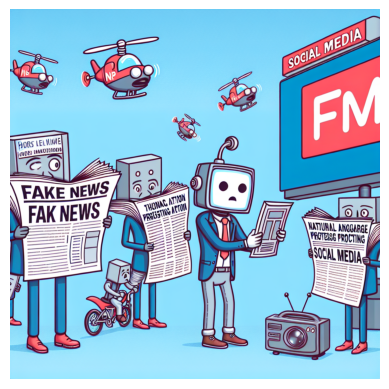


Charge sobre notícias falsas, PLN e redes sociais.


In [ ]:
# EXECUÇÃO DOS TESTES NO CAPÍTULO 23 - EXTRAÇÃO DE PALAVRAS (RECONHECIMENTO DE ENTIDADES NOMEADAS)
url_capitulos = ["https://brasileiraspln.com/livro-pln/1a-edicao/parte9/cap23/cap23.html"]

for url in url_capitulos:
    texto_html = obter_texto_da_url(url)

    texto_limpo = extrair_texto_html(texto_html)

    lista_paragrafos = texto_limpo.splitlines()

    lista_sem_links = [string for string in lista_paragrafos if "http" not in string]

    lista_textos_relevantes = [string for string in lista_sem_links if len(string) >= 200]

    lista_textos_tratados = [remover_entre_parenteses(string) for string in lista_textos_relevantes]

    lista_texto_agrupados = agrupar_strings(lista_textos_tratados, 2200)

    # Pegando um parágrafo aleatório dos existentes no capítulo
    paragrafo_aleatorio = random.choice(lista_texto_agrupados)

    # RESTRINGINDO para expressões famosas para evitar violar a política de violação de conteúdo da api da OpenAI
    prompt = "Quero que você retorne apenas uma lista no formato ['item1', 'item2', 'item3'], e nada mais, contendo as 3 expressões mais famosas (entidades nomeadas) encontradas no texto a seguir: " + texto
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="gpt-3.5-turbo",
        temperature=0.5, # TEMPERATURA MEDIANA PARA MELHORAR O RESUMO
        max_tokens=50 # LIMITAÇÃO DE TAMANHO DA RESPOTA
    )

    entidades = chat_completion.choices[0].message.content
    lista_entidades = eval(entidades)

    # IDEIA DE APLICAÇÃO: CRIAR UMA CHARGE A PARTIR DAS ENTIDADES NOMEADAS DO TEXTO

    subject = "Uma imagem relacionando as seguintes palavras: " + str(lista_entidades[0]) + ", " + str(lista_entidades[1]) + ", " + str(lista_entidades[2])
    style = "Estilo charge"
    prompt = ("Subject: " + subject + " Style: " + style)

    image_params = {
    "model": "dall-e-3",  # Defaults is dall-e-2
    "n": 1,               # Between 2 and 10 is only for DALL-E 2
    "size": "1024x1024",  # 256x256, 512x512 only for DALL-E 2 - not much cheaper
    "prompt": prompt,     # DALL-E 3: max 4000 characters, DALL-E 2: max 1000
    "user": "myName",     # pass a customer ID to OpenAI for abuse monitoring
    }

    images_response = client.images.generate(**image_params)

    image_url = images_response.data[0].model_dump()["url"]

    response = requests.get(image_url)

    image_obj = Image.open(BytesIO(response.content))

    plt.imshow(image_obj)
    plt.axis('off')  # Desativa os eixos
    plt.show()
    print(f"\nCharge sobre {lista_entidades[0]}, {lista_entidades[1]} e {lista_entidades[2]}.")
